In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('census-income (1).csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df.shape

(32561, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  annual_income   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [7]:
df.isnull().sum().sum()

0

In [8]:
df.duplicated().sum()

24

In [9]:
df.drop_duplicates(inplace = True)

<Axes: xlabel='age', ylabel='Density'>

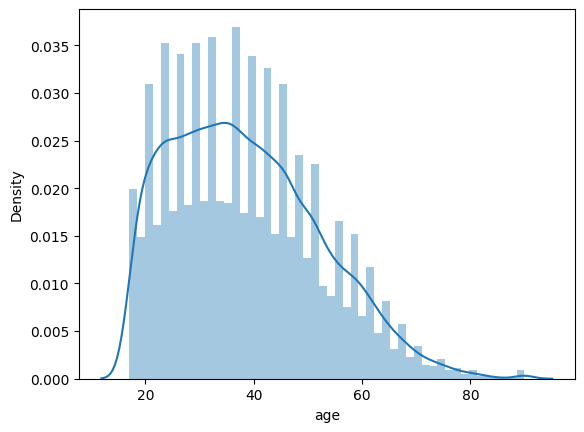

In [10]:
sns.distplot(df['age'])

In [11]:
## Right Skewed

In [12]:
df['age'].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)

In [13]:
df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [14]:
df['occupation'].unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [15]:
#replacing ? with null value
df = df.replace('?', np.nan)

In [16]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     582
annual_income        0
dtype: int64

In [17]:
df.dropna(inplace=True)

In [18]:
df.isna().sum().sum()

0

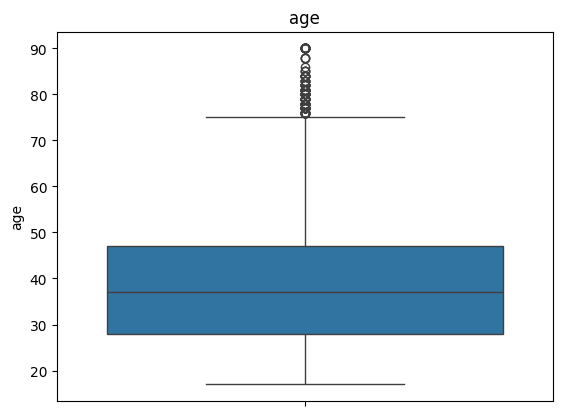

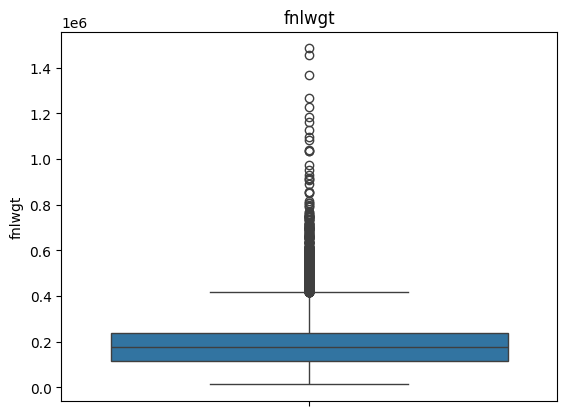

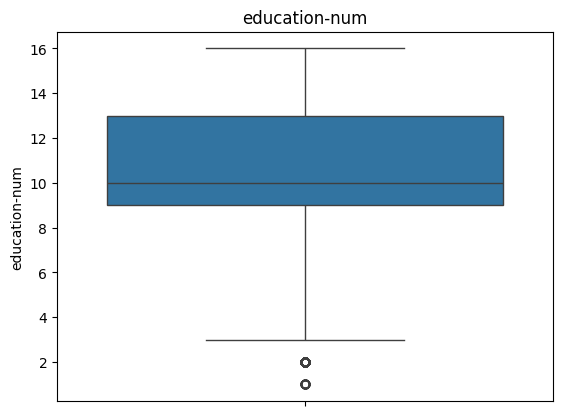

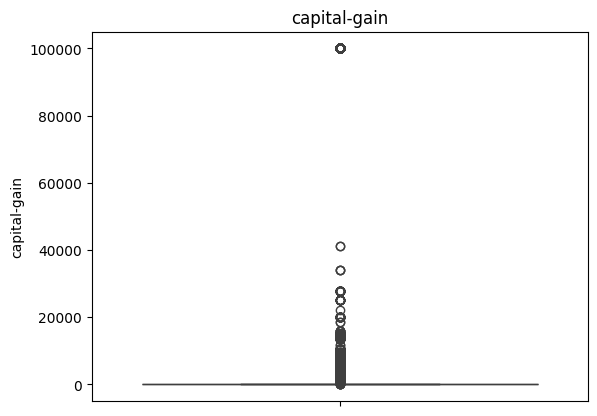

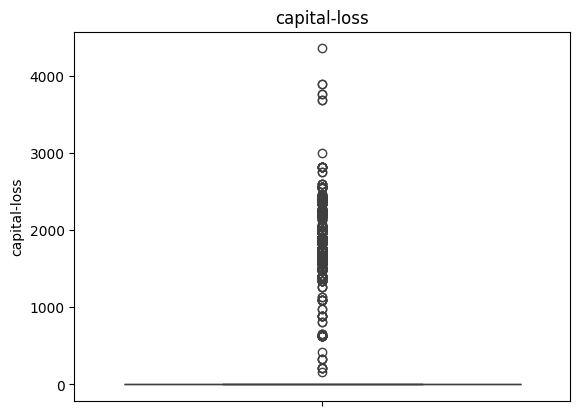

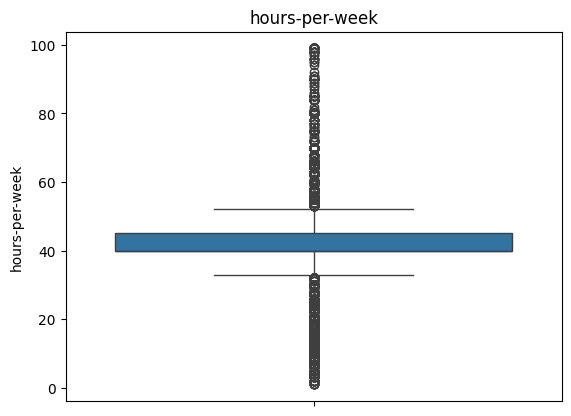

In [19]:
for x in df.columns:
    if df[x].dtype != 'object':
        sns.boxplot(df[x])
        plt.title(x)
        plt.show()

In [20]:
out_list = []

for x in df.columns:
    if ((df[x].dtype != 'object') & (x != 'capital-gain') & (x != 'capital-loss')):
        out_list.append(x)

In [21]:
out_list

['age', 'fnlwgt', 'education-num', 'hours-per-week']

### **Outlier Detection**

In [22]:
for x in out_list:
    Q1 = df[x].quantile(0.25)
    Q3 = df[x].quantile(0.75)

    IQR = Q3 - Q1

    LL = Q1 - 1.5*IQR
    UL = Q3 + 1.5*IQR

    df = df[(df[x] >= LL) & (df[x] <= UL)]
    

In [23]:
df.shape

(21317, 15)

### Modeling

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le = LabelEncoder()

In [26]:
for x in df.columns:
    if df[x].dtype == 'object':
        df[x] = le.fit_transform(df[x])

In [27]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,5,77516,8,13,4,0,1,4,1,2174,0,40,38,0
2,38,2,215646,10,9,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,8,13,2,9,5,2,0,0,0,40,4,0
5,37,2,284582,11,14,2,3,5,4,0,0,0,40,38,0


In [28]:
corr = df.corr(numeric_only= True)

<Axes: >

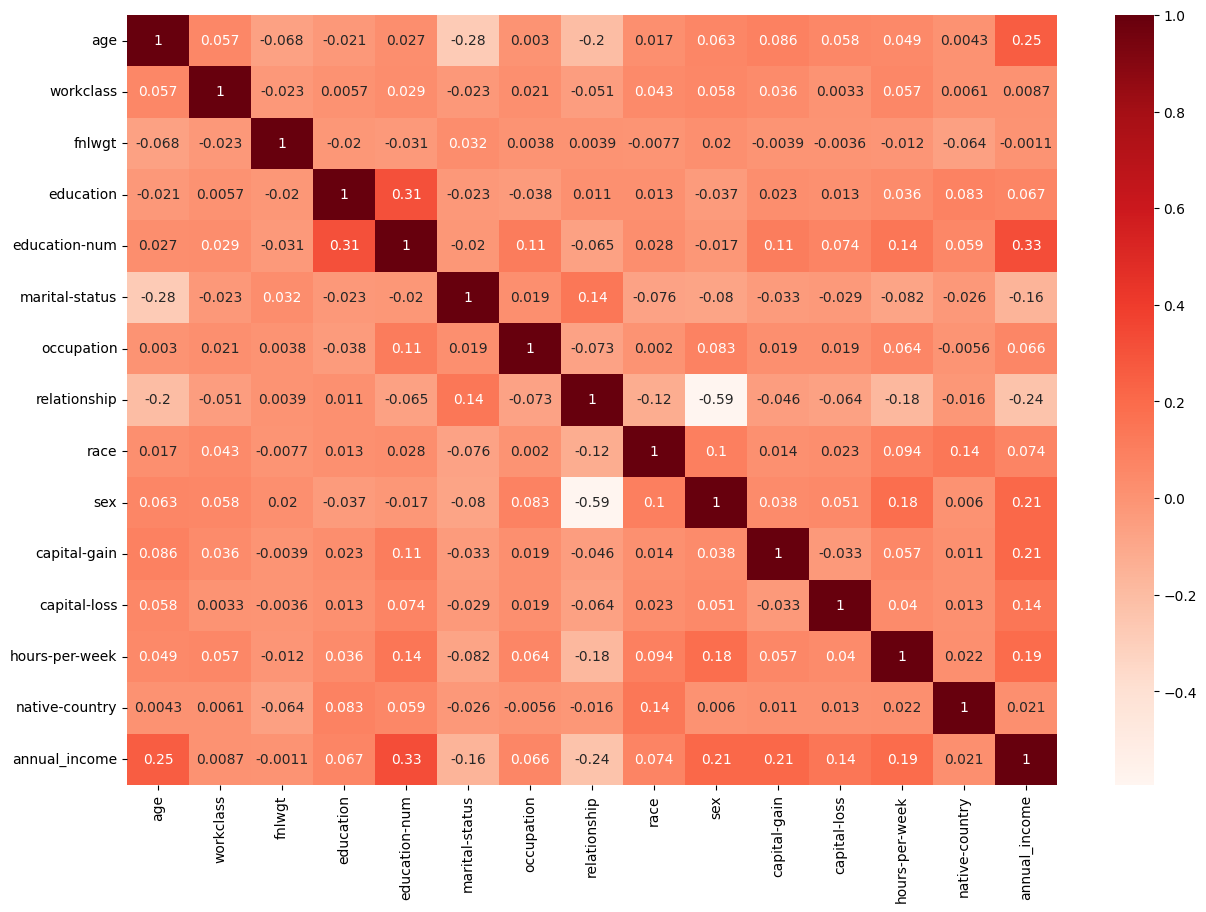

In [50]:
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap = 'Reds')

In [30]:
x = df.drop('annual_income', axis= 1)
y = df['annual_income']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [34]:
models = {
    'Logistic Regression Model' : LogisticRegression(),
    'Decision Tree Classifier' : DecisionTreeClassifier(),
    'Random Forest Classifier' : RandomForestClassifier()
}

In [35]:
models.items()

dict_items([('Logistic Regression Model', LogisticRegression()), ('Decision Tree Classifier', DecisionTreeClassifier()), ('Random Forest Classifier', RandomForestClassifier())])

In [36]:
from sklearn.metrics import *

In [37]:
for name,model in models.items():
    print(f'Name of the model: {name}')
    model.fit(x_train, y_train)
    pred = model.predict(x_test)

    print(f'Accuracy Score: {accuracy_score(y_test, pred)}')
    print('==================================================')
    print(f'Classification report: {classification_report(y_test, pred)}')
    print('==================================================')

Name of the model: Logistic Regression Model
Accuracy Score: 0.7772045028142589
Classification report:               precision    recall  f1-score   support

           0       0.78      0.96      0.86      3125
           1       0.71      0.28      0.40      1139

    accuracy                           0.78      4264
   macro avg       0.75      0.62      0.63      4264
weighted avg       0.77      0.78      0.74      4264

Name of the model: Decision Tree Classifier
Accuracy Score: 0.8032363977485929
Classification report:               precision    recall  f1-score   support

           0       0.87      0.87      0.87      3125
           1       0.63      0.63      0.63      1139

    accuracy                           0.80      4264
   macro avg       0.75      0.75      0.75      4264
weighted avg       0.80      0.80      0.80      4264

Name of the model: Random Forest Classifier
Accuracy Score: 0.8454502814258912
Classification report:               precision    recall  f1-s